In [1]:
import numpy as np
import pandas as pd
import os
import geopandas as gpd
from pyproj import Transformer, CRS
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [2]:
# load the GB PS data
network_root_path = os.path.join(os.getcwd(), 'GB_PrimarySubstation_Data')
# load the fundamental network dataset
GB_PS_df = pd.read_csv(os.path.join(os.path.dirname(network_root_path), "GB_PS_data.csv"))
GB_PS_df

,PS Name,Firm Capacity (MVA),Demand (MVA),PF,"Geo(Long,Lat)",GSP,DNO
0,albion st,22.863,11.720532,0.998712,"-2.4950937454916797,53.73015403195597",ROCHDALE,ENW
1,alderley & chelford,28.310,17.003134,0.975600,"-2.225911796847622,53.30796142675533",SOUTH MANCHESTER,ENW
2,alston,1.700,1.531605,0.985752,"-2.4352546655219385,54.81256830516162",HUTTON,ENW
3,ambleside,17.800,9.192532,0.993175,"-2.963194161426022,54.42314157846089",HUTTON,ENW
4,ancoats north t11 & t12,22.863,17.347102,0.992857,"-2.2271891138444646,53.485968874301655",WHITEGATE,ENW
...,...,...,...,...,...,...,...
4200,Wribbenhall 33/11kv,23.000,14.720000,NaN,"-2.3076,52.3853",Bishops Wood 132kV,WPD
4201,Yelverton,10.000,5.850000,NaN,"-4.0812,50.4948",Abham_Exeter _Landulph,WPD
4202,Ynys Street,13.600,8.160000,NaN,"-3.7753,51.5971",Swansea North 132 kV,WPD
4203,Ynysfeio,10.000,6.940000,NaN,"-3.5255,51.6697",Swansea North 132 kV,WPD


In [3]:
# convert the coordinate to the standard format
transformer = Transformer.from_crs("EPSG:4326", "EPSG:27700", always_xy=True)
GB_PS_df['Geo(X,Y)'] = GB_PS_df['Geo(Long,Lat)'].apply(lambda x: transformer.transform(x.split(',')[0], x.split(',')[1]))
# convert the format from (X, Y) to X,Y
GB_PS_df

,PS Name,Firm Capacity (MVA),Demand (MVA),PF,"Geo(Long,Lat)",GSP,DNO,"Geo(X,Y)"
0,albion st,22.863,11.720532,0.998712,"-2.4950937454916797,53.73015403195597",ROCHDALE,ENW,"(367434.0008092078, 426086.99969663005)"
1,alderley & chelford,28.310,17.003134,0.975600,"-2.225911796847622,53.30796142675533",SOUTH MANCHESTER,ENW,"(385044.0008179184, 379025.99965526996)"
2,alston,1.700,1.531605,0.985752,"-2.4352546655219385,54.81256830516162",HUTTON,ENW,"(372125.00082024984, 546498.9998101167)"
3,ambleside,17.800,9.192532,0.993175,"-2.963194161426022,54.42314157846089",HUTTON,ENW,"(337602.0007916664, 503505.99976734235)"
4,ancoats north t11 & t12,22.863,17.347102,0.992857,"-2.2271891138444646,53.485968874301655",WHITEGATE,ENW,"(385022.0008197698, 398829.9996731863)"
...,...,...,...,...,...,...,...,...
4200,Wribbenhall 33/11kv,23.000,14.720000,NaN,"-2.3076,52.3853",Bishops Wood 132kV,WPD,"(379161.2634769694, 276407.90082813695)"
4201,Yelverton,10.000,5.850000,NaN,"-4.0812,50.4948",Abham_Exeter _Landulph,WPD,"(252480.96013828448, 68180.01112406829)"
4202,Ynys Street,13.600,8.160000,NaN,"-3.7753,51.5971",Swansea North 132 kV,WPD,"(277131.1326646998, 190188.5633312018)"
4203,Ynysfeio,10.000,6.940000,NaN,"-3.5255,51.6697",Swansea North 132 kV,WPD,"(294601.0493914529, 197871.70190509432)"


In [4]:
# convert the dataframe to geodataframe for plotting
points_geometry = gpd.points_from_xy(GB_PS_df['Geo(X,Y)'].apply(lambda x: x[0]), GB_PS_df['Geo(X,Y)'].apply(lambda x: x[1]))
points_gdf = gpd.GeoDataFrame(GB_PS_df, geometry=points_geometry)
points_gdf

,PS Name,Firm Capacity (MVA),Demand (MVA),PF,"Geo(Long,Lat)",GSP,DNO,"Geo(X,Y)",geometry
0,albion st,22.863,11.720532,0.998712,"-2.4950937454916797,53.73015403195597",ROCHDALE,ENW,"(367434.0008092078, 426086.99969663005)",POINT (367434.001 426087.000)
1,alderley & chelford,28.310,17.003134,0.975600,"-2.225911796847622,53.30796142675533",SOUTH MANCHESTER,ENW,"(385044.0008179184, 379025.99965526996)",POINT (385044.001 379026.000)
2,alston,1.700,1.531605,0.985752,"-2.4352546655219385,54.81256830516162",HUTTON,ENW,"(372125.00082024984, 546498.9998101167)",POINT (372125.001 546499.000)
3,ambleside,17.800,9.192532,0.993175,"-2.963194161426022,54.42314157846089",HUTTON,ENW,"(337602.0007916664, 503505.99976734235)",POINT (337602.001 503506.000)
4,ancoats north t11 & t12,22.863,17.347102,0.992857,"-2.2271891138444646,53.485968874301655",WHITEGATE,ENW,"(385022.0008197698, 398829.9996731863)",POINT (385022.001 398830.000)
...,...,...,...,...,...,...,...,...,...
4200,Wribbenhall 33/11kv,23.000,14.720000,NaN,"-2.3076,52.3853",Bishops Wood 132kV,WPD,"(379161.2634769694, 276407.90082813695)",POINT (379161.263 276407.901)
4201,Yelverton,10.000,5.850000,NaN,"-4.0812,50.4948",Abham_Exeter _Landulph,WPD,"(252480.96013828448, 68180.01112406829)",POINT (252480.960 68180.011)
4202,Ynys Street,13.600,8.160000,NaN,"-3.7753,51.5971",Swansea North 132 kV,WPD,"(277131.1326646998, 190188.5633312018)",POINT (277131.133 190188.563)
4203,Ynysfeio,10.000,6.940000,NaN,"-3.5255,51.6697",Swansea North 132 kV,WPD,"(294601.0493914529, 197871.70190509432)",POINT (294601.049 197871.702)


In [5]:
# load the UK map data
root_path = os.getcwd()
uk_la_map_path = os.path.join(root_path, "Geo_data", "LAD_DEC_2022_UK_BFC.shp")
eng_region_map_df = gpd.read_file(os.path.join(root_path, "Geo_data", "Regions_(December_2022)_EN_BFC.shp"))
uk_la_map_df = gpd.read_file(uk_la_map_path)
# these codes can be found in the gov web
Scot_la_code_list = ['S12000005','S12000006','S12000008','S12000010','S12000011','S12000013','S12000014','S12000017',
                     'S12000018','S12000019','S12000020','S12000021','S12000023','S12000026','S12000027','S12000028',
                     'S12000029','S12000030','S12000033','S12000034','S12000035','S12000036','S12000038','S12000039',
                     'S12000040','S12000041','S12000042','S12000045','S12000047','S12000048','S12000049','S12000050']
Wales_la_code_list = ['W06000001', 'W06000002', 'W06000003', 'W06000004', 'W06000005', 'W06000006', 'W06000023', 'W06000008', 'W06000009', 'W06000010',
                      'W06000011', 'W06000012', 'W06000013', 'W06000014', 'W06000015', 'W06000016', 'W06000024', 'W06000018', 'W06000019', 'W06000020',
                      'W06000021', 'W06000022']

ScotWales_la_code_list = Scot_la_code_list + Wales_la_code_list
ScotWales_la_map_df = uk_la_map_df[uk_la_map_df["LAD22CD"].isin(ScotWales_la_code_list)]

map_df = pd.concat([ScotWales_la_map_df.rename(columns={"LAD22CD":"RegID", "LAD22NM":"RegName"}), eng_region_map_df.rename(columns={"RGN22CD":"RegID", "RGN22NM":"RegName"})]).pipe(gpd.GeoDataFrame)

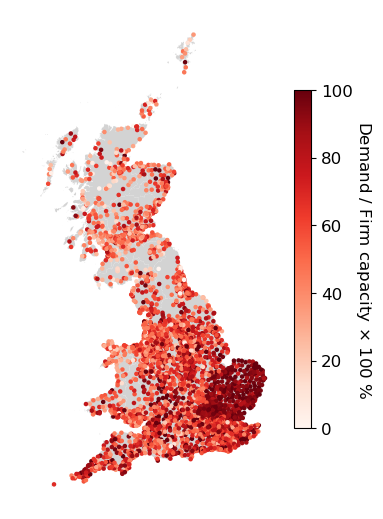

In [11]:
# Plot the map
# set font size
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize = [4, 6])
map_df.plot(color='lightgrey', figsize=(10, 10), ax=ax)
# calculate the demand utilisation in % for each substation
points_gdf['utilisation%'] = ((points_gdf['Demand (MVA)'] / points_gdf['Firm Capacity (MVA)'])) * 100
# replace the inf value with 0
points_gdf['utilisation%'] = points_gdf['utilisation%'].replace([np.inf, -np.inf], 0)
# Plot the points on the map with color based on values
vmin, vmax = 0, 100
# [points_gdf['DNO'] == 'UKPN']
points_gdf.plot(ax=ax, column='utilisation%', cmap='Reds', markersize=5, legend=True, vmin=vmin, vmax=vmax, legend_kwds={
        "shrink":.6
    },)
# remove the axis
ax.axis('off')
# add text on top of the color bar
cax = ax.get_figure().get_axes()[1]
cax.set_ylabel(r'Demand / Firm capacity $\times$ 100 %', rotation=270, labelpad=15)
# tight layout
plt.tight_layout()
# save the figure
# plt.savefig(os.path.join(root_path, "GB_PS_utilisation_map.png"), dpi=300)

In [7]:
# print the average utilisation by DNO, use groupby
points_gdf.groupby('DNO')['utilisation%'].mean()

DNO
ENW     57.997269
NPG     57.711651
SPEN    48.684462
SSEN    58.707985
UKPN    81.371469
WPD     64.893498
Name: utilisation%, dtype: float64

In [8]:
network_root_path = os.path.join(os.getcwd(), 'GB_PrimarySubstation_Data')

UKPN = os.path.join(network_root_path, 'UK Power Networks')

# ukpn is for primary substation only
ukpn = pd.read_csv(os.path.join(UKPN, 'ukpn_primary_postcode_area.csv'))
ukpn.dropna(subset=['DemandHeadroom', 'FirmCapaci', 'PrimarySu'], inplace=True)
(100-ukpn["DemandHeadroom"].str.rstrip('%').astype('float')).mean()

81.43008695652173

In [9]:
GB_PS_df_extend = pd.read_csv(os.path.join(os.path.dirname(network_root_path), "GB_PS_data_extend.csv"))
GB_PS_df_extend['utilisation%'] = ((GB_PS_df_extend['Demand (MVA)'] / GB_PS_df_extend['Firm Capacity (MVA)'])) * 100
GB_PS_df_extend[GB_PS_df_extend['DNO'] == 'UKPN'].groupby('RegName')['utilisation%'].mean()

RegName
East of England    93.196989
London             70.703269
South East         71.595202
Name: utilisation%, dtype: float64

In [10]:
GB_PS_df_extend[GB_PS_df_extend['DNO'] == 'WPD'].groupby('RegName')['utilisation%'].mean()

RegName
Blaenau Gwent               51.570059
Bridgend                    54.143649
Caerphilly                  67.107378
Cardiff                     54.361270
Carmarthenshire             50.999595
Ceredigion                  66.346734
East Midlands               68.460931
East of England             58.266667
Merthyr Tydfil              59.761607
Monmouthshire               54.345253
Neath Port Talbot           55.227036
Newport                     77.840801
North West                  57.200000
Pembrokeshire               64.943105
Powys                       64.946443
Rhondda Cynon Taf           54.512992
South East                  61.094607
South West                  67.155774
Swansea                     57.550327
Torfaen                     61.680556
Vale of Glamorgan           47.644364
West Midlands               63.129351
Yorkshire and The Humber    78.230769
Name: utilisation%, dtype: float64